LGMVIP-DataScience Internship - February 2022

Beginner Level Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

Author - Rohith Kumar.M

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense
from sklearn.metrics import mean_squared_error
%matplotlib inline

Loading the Dataset

In [2]:
data_lstm=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

Summarizing the Dataset

In [3]:
data_lstm.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data_lstm.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
data_lstm.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [6]:
data_lstm.shape

(2035, 8)

In [7]:
df=data_lstm.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

Data Visualization

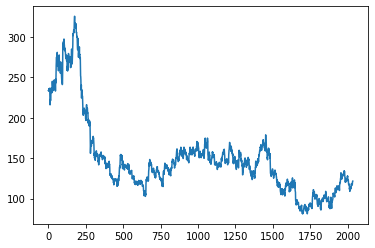

In [8]:
plt.plot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb572dfdd50>,
      dtype=object)

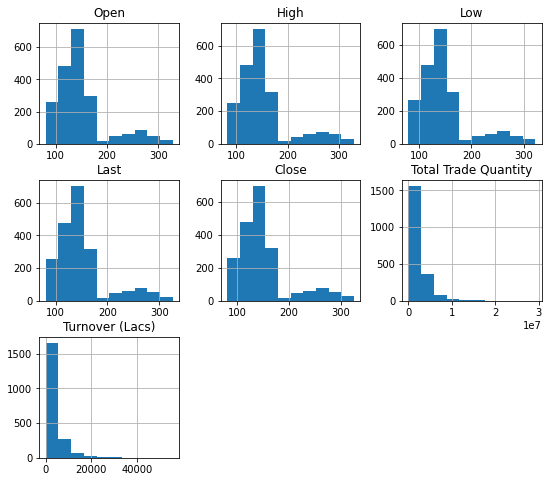

In [9]:
data_lstm.hist(figsize=(9,8))

LSTM are sensitive to the scale of the data, therefore we apply MinMax Scaler to transform our values between 0 and 1

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


Splitting dataset into train and test

In [11]:
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [12]:
training_size,test_size

(1526, 509)

In [13]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.18831699],
       [0.18811275],
       [0.17034314]])

In [14]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [16]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

Building the Stacked LSTM Model

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 64, verbose = 1)

Epoch 1/5
23/23 [==============================] - 20s 406ms/step - loss: 0.0321 - val_loss: 0.0065
Epoch 2/5
23/23 [==============================] - 15s 658ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 3/5
23/23 [==============================] - 9s 372ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 4/5
23/23 [==============================] - 8s 367ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 5/5
23/23 [==============================] - 8s 359ms/step - loss: 0.0014 - val_loss: 0.0015


Plotting the graph

In [19]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

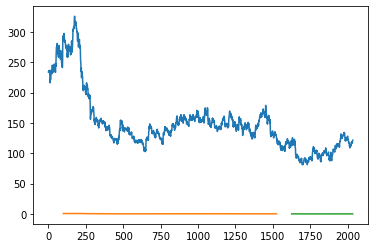

In [20]:
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Prediction

In [21]:
len(test_data)

509

In [22]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 168)

In [23]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [24]:
temp_input

[0.06801470588235292,
 0.0667892156862745,
 0.07414215686274506,
 0.0716911764705882,
 0.08639705882352938,
 0.08312908496732024,
 0.06311274509803921,
 0.06290849673202609,
 0.05167483660130712,
 0.031862745098039214,
 0.04003267973856206,
 0.03860294117647056,
 0.041053921568627416,
 0.033905228758169925,
 0.031249999999999944,
 0.026348039215686292,
 0.05861928104575159,
 0.06311274509803921,
 0.06209150326797386,
 0.055351307189542454,
 0.08455882352941174,
 0.05514705882352938,
 0.06045751633986923,
 0.055759803921568596,
 0.04391339869281047,
 0.029207516339869233,
 0.028186274509803877,
 0.04718137254901961,
 0.06045751633986923,
 0.05861928104575159,
 0.06168300653594766,
 0.06699346405228751,
 0.07087418300653592,
 0.07557189542483661,
 0.07700163398692805,
 0.10375816993464049,
 0.10314542483660127,
 0.10334967320261434,
 0.10089869281045749,
 0.1043709150326797,
 0.0980392156862745,
 0.09722222222222221,
 0.09783496732026142,
 0.09579248366013071,
 0.09109477124183002,
 0.09

In [25]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [26]:
math.sqrt(mean_squared_error(y_train,train_predict))


162.12762690659162

In [27]:
math.sqrt(mean_squared_error(y_test,test_predict))

111.0052963780105

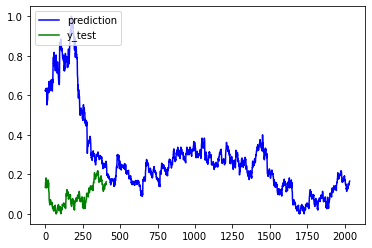

In [28]:
plt.plot(df,color='blue', label='prediction')
plt.plot(y_test,color='green', label='y_test')
plt.legend(loc='upper left')
plt.show()